# SENCE 2025 Examples

## inselpy

* https://insel.eu/development/
* https://pypi.org/project/insel/


In [1]:
import insel
insel.block('sum', 2, 3)

5.0

In [2]:
insel.block('do', parameters=[1, 10, 1])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [3]:
insel.block('gain', 2, 5, 7, parameters=[3], outputs=3)

[6.0, 15.0, 21.0]

In [4]:
insel.template('x_times_y.vseit', x=2, y=4)

8.0

## streamlit

https://streamlit.io/

```python
# save to web_app.py
# run with: 
#   streamlit run my_web_app.py

import streamlit as st
import insel

st.title("INSEL online")
x = st.slider("X", 0, 100, 25)
y = st.slider("Y", 0, 100, 25)

result = insel.block('SUM', x, y)
st.write(f"{x} + {y} = {result}")
```

## streamlit + INSEL templates

https://github.com/EricDuminil/streamlit_insel

![Screenshot](https://raw.githubusercontent.com/EricDuminil/streamlit_insel/refs/heads/main/docs/screenshot.png)

```python
import insel
import streamlit as st

st.set_page_config(layout="wide", page_title="PV + Last + Batterie")
st.markdown(
    "<h1 style='text-align: center'>PV + Last + Batterie</h1>", unsafe_allow_html=True
)

left, right = st.columns([2, 3])

with left:
    st.header("Inputs")
    verbrauch = st.slider("🔌 Verbrauch", 1, 50, 10, format="%g MWh / a")
    pvleistung = st.slider("🌞 PV Leistung", 1, 50, 10, format="%g kWp")
    wirkungsgrad = st.slider("🦾 Batteriewirkungsgrad", 1, 100, 95, format="%g %%")
    kapazitaetbatterie = st.slider("🔋 Batteriekapazitaet", 0, 50, 5, format="%g kWh")

with right:
    st.header("Ergebnisse")
    eigenverbrauchsquote, autarkiequote, cycles = insel.template(
        "Last_PV_Batterie.vseit",
        MWh_Verbrauch=verbrauch,
        kWp_PV=pvleistung,
        Kapazitaet_Batterie=kapazitaetbatterie,
        Wirkungsgrad_Batterie=wirkungsgrad / 100,
    )

    st.progress(
        eigenverbrauchsquote,
        text=f"🏠 Eigenverbrauchsquote = {eigenverbrauchsquote*100:.0f} %",
    )

    st.progress(
        autarkiequote,
        text=f"🏝️ Autarkiequote = {autarkiequote*100:.0f} %",
    )

    st.badge(f"{cycles:.0f} Zyklen / a")
    st.subheader("Bezug")
    # NOTE: Could add a random id, for multi-users
    st.image("/tmp/Last_PV_Batterie.png")
```

## random facts

In [5]:
import requests

# Example: API for a random fact
url = "https://uselessfacts.jsph.pl/random.json?language=en"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("💡 Did you know?")
    print(data['text'])
else:
    print("Could not fetch the fact.")

💡 Did you know?
Humans use a total of 72 different muscles in speech.


## rich

In [6]:
from rich.progress import track
import time

for i in track(range(20), description="Hacking NASA..."):
    time.sleep(0.1)  # Simulate work


Output()

## prettymapp

https://prettymapp.streamlit.app/

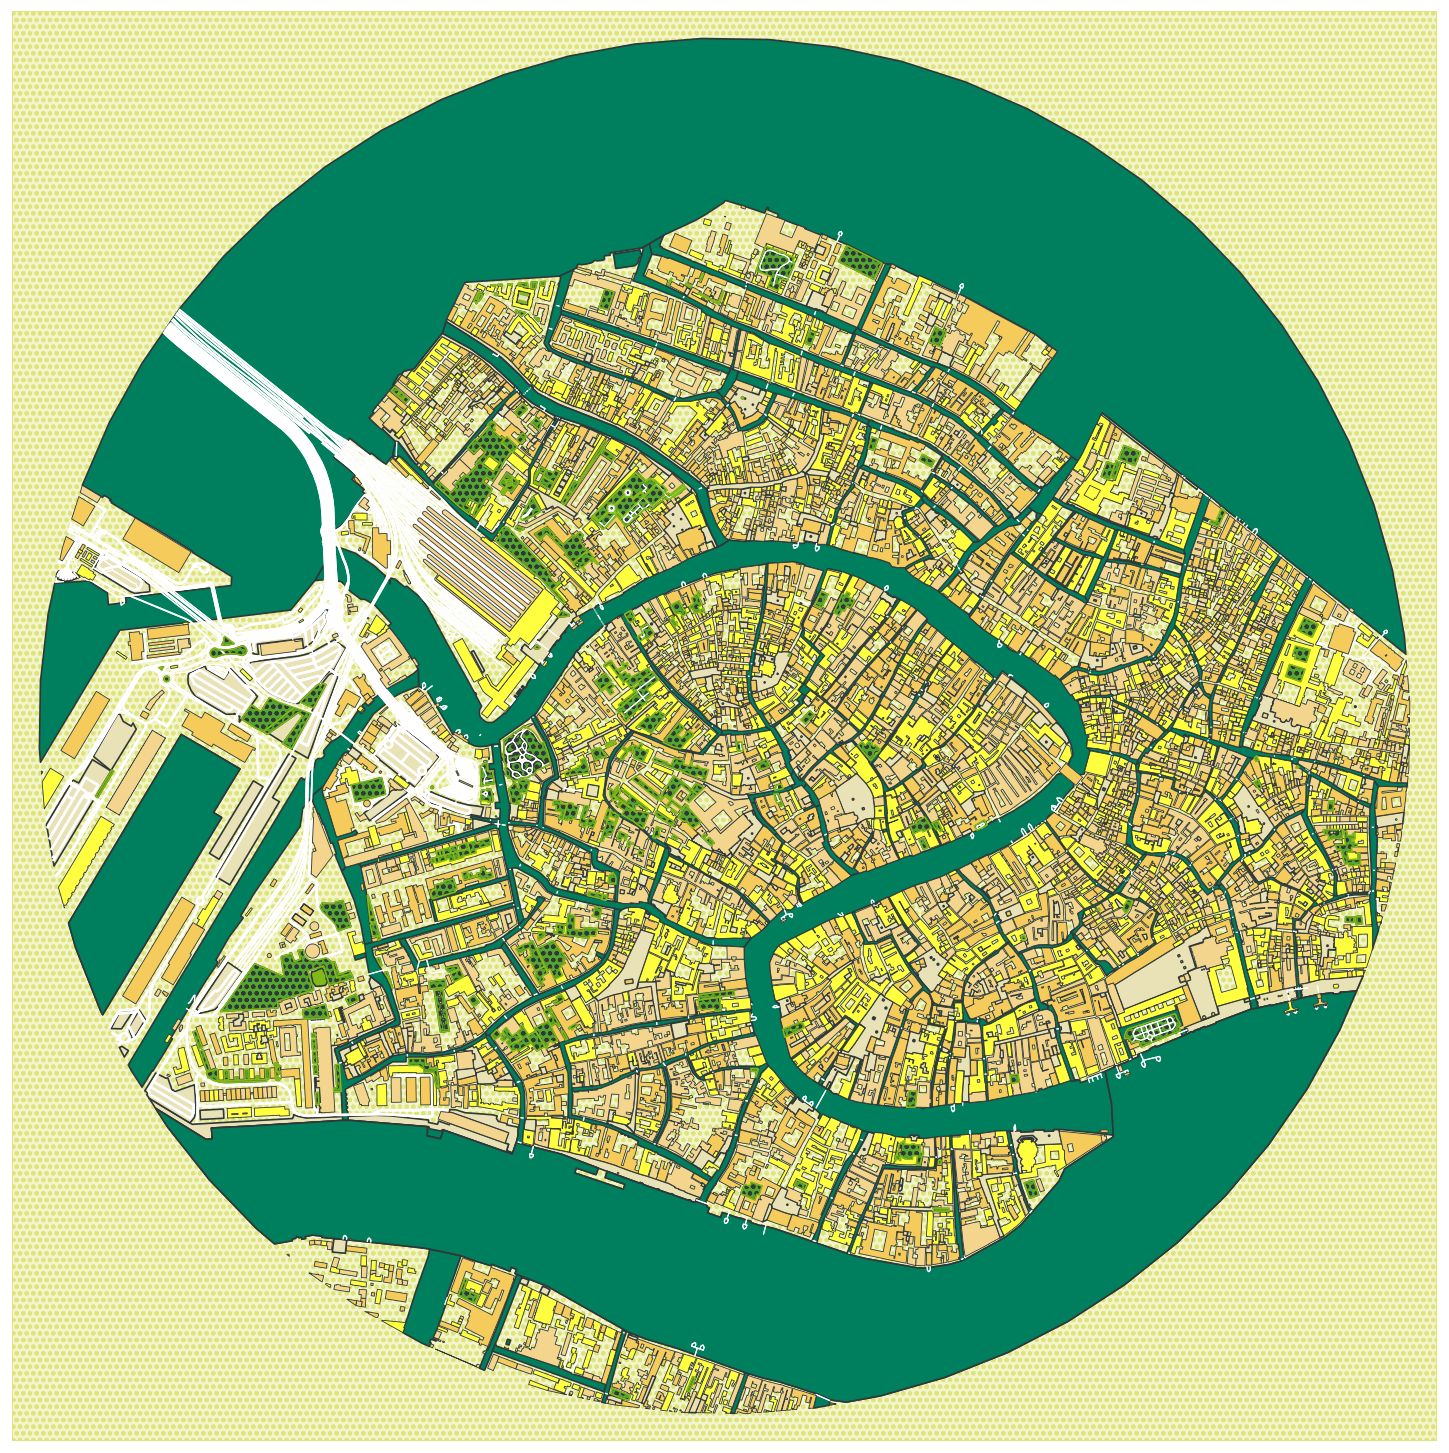

In [9]:
from prettymapp.geo import get_aoi
from prettymapp.osm import get_osm_geometries
from prettymapp.plotting import Plot
from prettymapp.settings import STYLES

aoi = get_aoi(
    # Location can either be defined by coordinates:
    coordinates=(45.43900, 12.32625),
    # or an address:
    # address="Praça Ferreira do Amaral, Macau",
    radius=1500,
    rectangular=False,
)

df = get_osm_geometries(aoi=aoi)

fig = Plot(
    df=df,
    aoi_bounds=aoi.bounds,
    draw_settings=STYLES["Citrus"],
    credits=False,
).plot_all()

fig.set_dpi(120)

# If you want to save it to a PNG file, with 3600x3600px
# fig.savefig("images/venice.png", dpi=300)

## Satellite images

https://github.com/EricDuminil/satellite-imagery-downloader

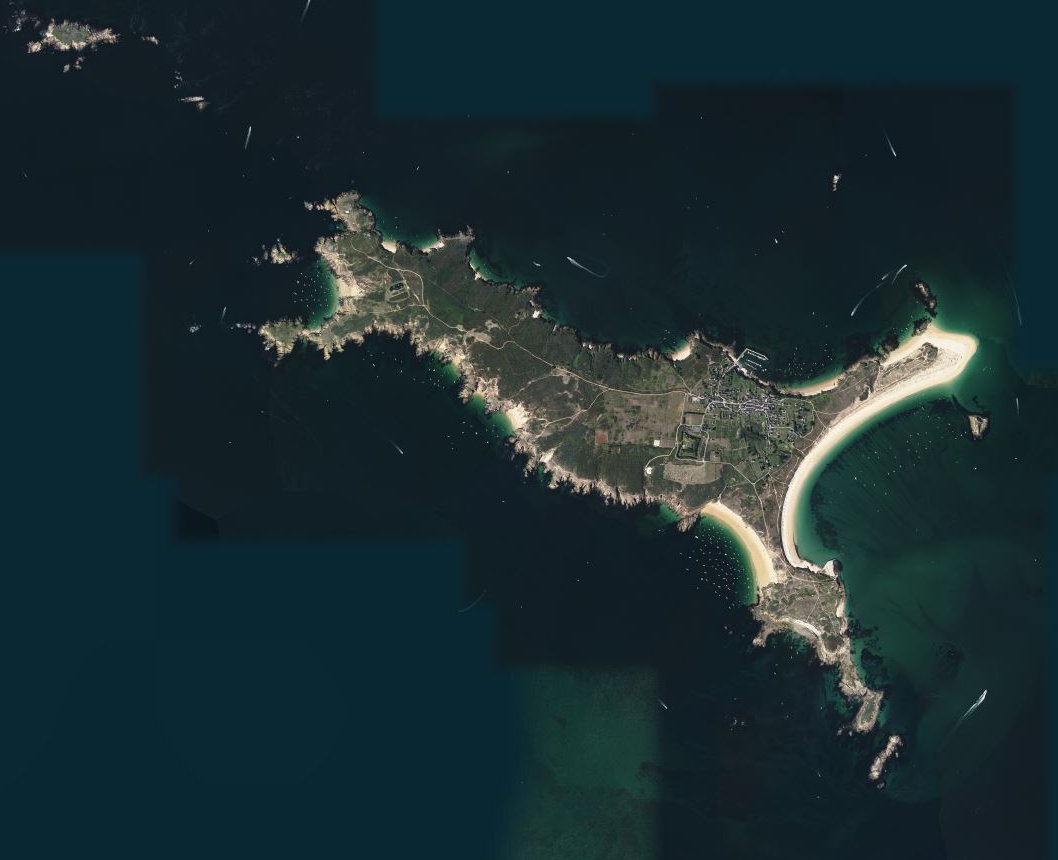

In [10]:
from IPython.display import Image
Image(filename='images/houat.png')

## pandas

In [7]:
import pandas as pd

pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      male  22.0                        1                        0   7.2500  
1    female  38.0                        1                        0  71.2833  
2    female  26.0                        0                        0   7.9250  
3    female  35.0                        1                        0  53.1000  
4      male  35.0                        0                        0   8.0500  
..      ...   ...                      ...                      ...      ...  
882    male  27.0                        0                        0  13.0000  
883  female  19.0                        0                        0  30.0000  
884  female   7.0                        1                        2  23.4500  
885    male  26.0                        0                        0  30.0000  
886    male  32.0                        0                        0   7.7500  

[887 rows x 8 columns]

In [8]:
pd.read_csv('http://ultra.ericduminil.com/data/all_ultras.csv', sep=';')

id               name      miles division  laps discipline  \
0     miami_2025_151        Joe Mazzone  320.29200     Open   217       Push   
1      miami_2021_49        Joe Mazzone  313.90000     Open   215       Push   
2      dutch_2017_13         Rick Pronk  313.17108     Open   160       Push   
3      dutch_2018_18         Rick Pronk  311.21376     Open   159       Push   
4     miami_2016_201      Andrew Andras  309.52000     Open   212       Push   
...              ...                ...        ...      ...   ...        ...   
1569  miami_2015_256  Jennifer Gonzalez    7.30000    Women     5       Push   
1570   miami_2019_26      Zack Knezevic    7.30000     Open     5       Push   
1571  miami_2025_138      Scott Ziegler    5.90400     Open     4       Push   
1572  miami_2022_132             Zack K    2.92000     Open     2       Push   
1573   miami_2023_64  Leonard L Leffler    1.46000     Open     1     Paddle   

     country    age  elapsed_time  kilometers        venue  year  
0         US  30-39      23.92384     515.460  Miami Ultra  2025  
1         US  30-39      23.64750     505.173  Miami Ultra  2021  
2         NL   1-49      23.95963     504.000  Dutch Ultra  2017  
3         NL   1-49      23.91601     500.850  Dutch Ultra  2018  
4         US  30-39      23.96444     498.124  Miami Ultra  2016  
...      ...    ...           ...         ...          ...   ...  
1569      US  19-29       8.89917      11.748  Miami Ultra  2015  
1570      US  30-39      17.43500      11.748  Miami Ultra  2019  
1571      US  40-49      23.14916       9.502  Miami Ultra  2025  
1572   World  40-49      13.85972       4.699  Miami Ultra  2022  
1573      US  50-59      23.00992       2.350  Miami Ultra  2023  

[1574 rows x 12 columns]

## Large data


Library:
https://docs.xarray.dev/en/stable/

Data:
https://berkeleyearth.org/data/
https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Gridded/Land_and_Ocean_LatLong1.nc

In [11]:
import xarray as xr

# from https://berkeleyearth.org/data/
ds = xr.open_dataset("~/Downloads/Land_and_Ocean_LatLong1.nc")

In [12]:
ds

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2100, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.025e+03 2.025e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               09-Jan-2025 20:35:17
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   04-Jan-2025 19:11:11
    ocean_source_history:  06-Jan-2025 11:47:59
    comment:               This file contains Berkeley Earth surface temperat...

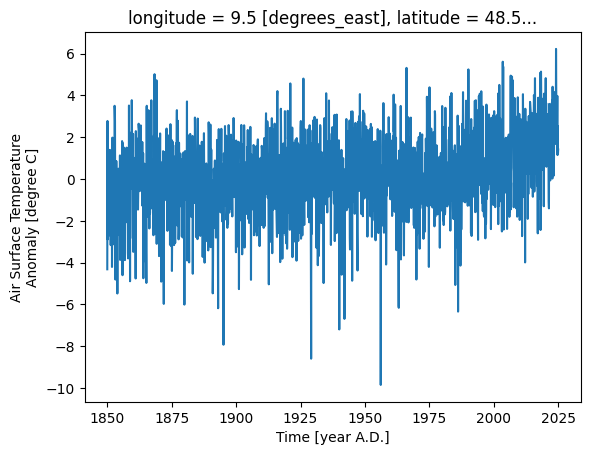

In [13]:
ds.sel(longitude=9, latitude=48.7, method='nearest')['temperature'].plot();

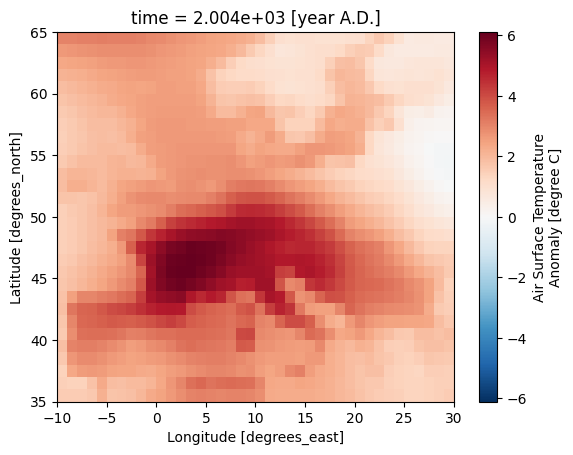

In [14]:
ds.sel(time=2003 + 7.5 / 12, method='nearest').sel(latitude=slice(35, 65), longitude=slice(-10,30))['temperature'].plot();

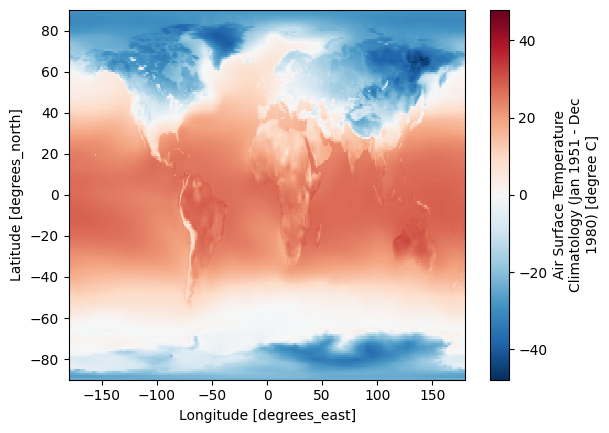

In [15]:
ds.climatology.sel(month_number=0).plot();

In [16]:
stuttgart = ds.sel(longitude=9, latitude=48.7, method='nearest')
stuttgart

<xarray.Dataset>
Dimensions:      (time: 2100, month_number: 12)
Coordinates:
    longitude    float32 9.5
    latitude     float32 48.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.025e+03 2.025e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    float64 ...
    temperature  (time) float32 ...
    climatology  (month_number) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               09-Jan-2025 20:35:17
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   04-Jan-2025 19:11:11
    ocean_source_history:  06-Jan-2025 11:47:59
    comment:               This file contains Berkeley Earth surface temperat...

In [17]:
import numpy as np

In [18]:
months = (np.floor((stuttgart.time - np.floor(stuttgart.time))*12)).astype(int)

In [19]:
df = pd.DataFrame({
              'year': np.floor(stuttgart.time).astype(int),
              'month': months + 1,
              'temperature': stuttgart.climatology[months] + stuttgart.temperature,
             },            
            )
df

year  month  temperature
0     1850      1    -2.558053
1     1850      2     5.262820
2     1850      3     2.164932
3     1850      4     8.349158
4     1850      5    10.533581
...    ...    ...          ...
2095  2024      8    20.524185
2096  2024      9    15.114173
2097  2024     10    12.679502
2098  2024     11     7.373162
2099  2024     12     4.583126

[2100 rows x 3 columns]

In [20]:
df.to_csv('output/stuttgart_monthly_temperatures.csv', index=False, sep='\t')

## Edward R. Tufte, _The Visual Display of Quantitative Information_

Book: https://www.edwardtufte.com/book/the-visual-display-of-quantitative-information/

Examples: https://www.ajnisbet.com/blog/tufte-in-matplotlib

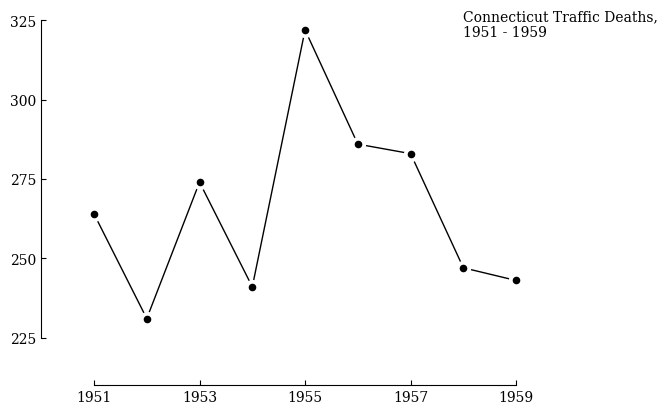

In [21]:
# From https://www.ajnisbet.com/blog/tufte-in-matplotlib

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Global options.
plt.rcParams['font.family'] = 'serif'

# Data from p74 of Visual Display of Quantitative Information.
x = list(range(1951, 1960))
y = [264, 231, 274, 241, 322, 286, 283, 247, 243]

# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, zorder=2)
ax.scatter(x, y, color='black', s=20, zorder=3)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(225, 325)

# Reduce tick spacing.
x_ticks = list(range(min(x), max(x)+1, 2))
ax.xaxis.set_ticks(x_ticks)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

# Adjust lower limits to let data breathe.
ax.set_xlim([1950, ax.get_xlim()[1]])
ax.set_ylim([210, ax.get_ylim()[1]])

# Axis labels as a title annotation.
ax.text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')
plt.show();


https://quarto.org/docs/gallery/ ?

## CityGML ?

https://transfer.hft-stuttgart.de/gitlab/eric.duminil/get-bw-opendata

## marimo?

* https://marimo.io/
* https://koaning.github.io/drawdata/
* https://martidossi.github.io/a-data-story/apps/1_when_european_fly_nest.html ?

## pyvista?

https://docs.pyvista.org/

![pyvista 3d](https://docs.pyvista.org/_static/pyvista_banner_small.png)